> Waiting for a light to stamp...> Grabbing 10 seconds of pupil.1.3d

Waiting for futures...
Waiting for futures...
Waiting for futures...
> Light stamped on frame.world at 12285.197579
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
> PupilGrabber done grabbing 10 seconds of pupil.1.3d


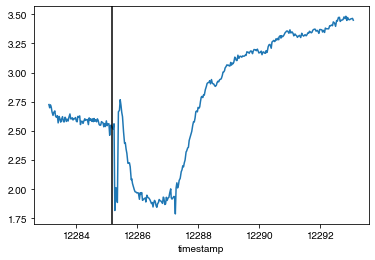

In [5]:
from time import sleep

from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas

# Connect to Pupil Core
p = PupilCore()

# Start a new recording called "my_recording". Note that this is not 
# necessary for the .light_stamper(...) and .pupil_grabber(...) to work
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
lst_future = p.light_stamper(annotation=annotation, timeout=10)
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=10)

##################################
# Administer light stimulus here #
##################################

# Wait for the futures
while lst_future.running() or pgr_future.running():
    print('Waiting for futures...')
    sleep(1)

# Get the timesamp and pupil data
timestamp = lst_future.result()[1]
data = unpack_data_pandas(pgr_future.result())

# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')